In [1]:
from random import expovariate
from statistics import mean, pstdev
from math import inf as Infinity
from random import seed
from matplotlib.pyplot import *
from time import time
import sympy as sys

ModuleNotFoundError: No module named 'sympy'

Ahora podemos meter la función en un bucle y analizar visualmente la variabilidad de los resultados que se obtienen al repetir muchas veces el experimento.

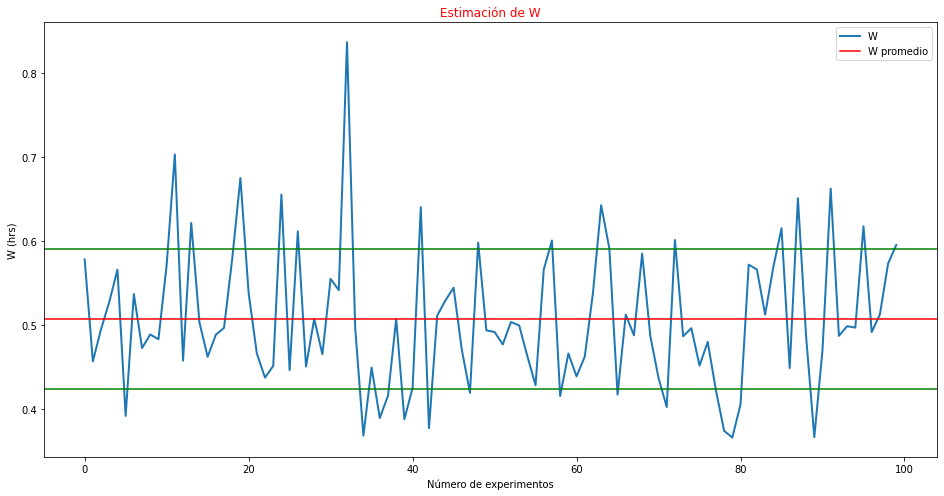

Retraso promedio W =  0.5071
Con un error de = 0.083
W está entre: 0.4241 y 0.5901


In [ ]:
lamda = 4.0
mu = 6.0


Num_Rep = 100                       # Numero de repeticiones
Delay = []                          # Lista de resultados para el retraso promedio W 

for i in range(Num_Rep):
    seed() 
    d = mm1_W(lamda, mu,1000)
    Delay.append(d)

# Estimación del promedio de las repeticiones

fig = figure(1, figsize=(16,8))
plot(Delay, linewidth=2, label='W')
axhline(y=mean(Delay), color='red',label='W promedio')
axhline(y=mean(Delay) + pstdev(Delay), color='green')
axhline(y=mean(Delay) - pstdev(Delay), color='green')
title("Estimación de W", color = 'red')
xlabel('Número de experimentos')
ylabel('W (hrs)')
legend()
show()


print("Retraso promedio W = " , round( mean(Delay), 4) )
print("Con un error de =", round(pstdev(Delay), 4))
print("W está entre:" , round(mean(Delay) - pstdev(Delay), 4), "y", round(mean(Delay) + pstdev(Delay), 4) )

Usaremos la misma función mm1_W pero ahora pediremos que devuelva la lista de datos completos, no solamente la media.

In [ ]:
def mm1_W(lamda, mu, Num_Pkts):
    #Num_Pkts = 100000                   # Numero de paquetes a simular
    #T = 100000
    count = 0                           # Contador de paquetes simulados
    t = 0
    N = 0                               # Variable de estado: numero de paquetes en el sistema

    tll = expovariate(lamda)            # Tiempo de llegada
    ts = Infinity                       # Tiempo de salida

    # Variables de salida
    tll_Data = []                       # Lista de tiempos de llegada
    ts_Data = []                        # Lista de tiempos de salida
    r_Data = []                         # Lista de retrasos individuales

    while count < Num_Pkts:
    #while t < T:
        if tll < ts:                           # Evento de llegada
            t = tll
            tll_Data.append(t)
            N = N + 1.0
            tll = t + expovariate(lamda) 
            if N == 1:
                ts = t + expovariate(mu)
        else:                                         # Evento de salida
            t = ts 
            ts_Data.append(t)
            N = N - 1.0
            count = count + 1                         # Paquetes simulados
            if N > 0:
                ts = t + expovariate(mu)
            else:
                ts = Infinity

    # Estimación del retraso promedio:

    for i in range(Num_Pkts):
    #for i in range(T):
        d = ts_Data[i] - tll_Data[i]
        r_Data.append(d)

    return r_Data

Ahora definiremos una nueva función que ejecuté mm1_W y vaya actualizando los promedios de las salidas.

In [ ]:
def mm1_W_cum(lamda, mu, Num_Pkts):
    Delay = mm1_W(lamda, mu, Num_Pkts)
    Delay_Cum = []
    for i in range(Num_Pkts):
        Delay_Cum.append( sum(Delay[0:i+1])/(i+1) )

    return Delay_Cum

Esto nos permitirá implementar un método sencillo para determinar visulmente un punto de división entre los estados transitorio y estable.

### Método de Welch

1. Para cada variable de salida correr la simulación al menos 5 veces, cada una de tamaño $m$. 

2. Calcular el promedio $Z$ de las realizaciones del paso 1.

3. Graficar la secuencia $Z$.

4. Elija el punto de corte. En el estado estable la gráfica de $Z$ es plana.

### Ejercicio (01/04/22):

Elija el punto de corte, agregue las líneas de código necesarias para graficar una línea vertical y rotular el punto de corte.


 0.48341
0.15673
0.21069
0.25038
0.27857
0.2647
0.26226
0.24571
0.24272
0.23507
0.2308
0.23834
0.24346
0.23606
0.23779
0.23714
0.24176
0.24972
0.25253
0.25248
0.25738
0.26162
0.26179
0.25531
0.25437
0.26039
0.26224
0.2666
0.27056
0.27242
0.27361
0.27454
0.27777
0.28901
0.29572
0.30163
0.30617
0.3129
0.32257
0.33463
0.34751
0.35863
0.37245
0.38545
0.39977
0.41422
0.42843
0.44172
0.45594
0.46767
0.47629
0.48154
0.48464
0.48775
0.48986
0.49172
0.49278
0.49308
0.49464
0.49641
0.49842
0.49966
0.50019
0.5012
0.5023
0.50254
0.50143
0.49903
0.49585
0.49557
0.49497
0.49464
0.49608
0.49728
0.49908
0.5001
0.50162
0.50563
0.5091
0.51203
0.51375
0.51505
0.51687
0.51643
0.51379
0.51277
0.51258
0.5114
0.50995
0.50765
0.50546
0.50361
0.50292
0.50282
0.50267
0.50146
0.4988
0.49558
0.49361
0.49235
0.49025
0.48946
0.48813
0.48625
0.4851
0.48469
0.48599
0.48701
0.48787
0.48854
0.48965
0.48971
0.49066
0.4893
0.48841
0.48867
0.489
0.48947
0.48909
0.48956
0.48864
0.48771
0.48641
0.48495
0.48325
0.48164
0.48

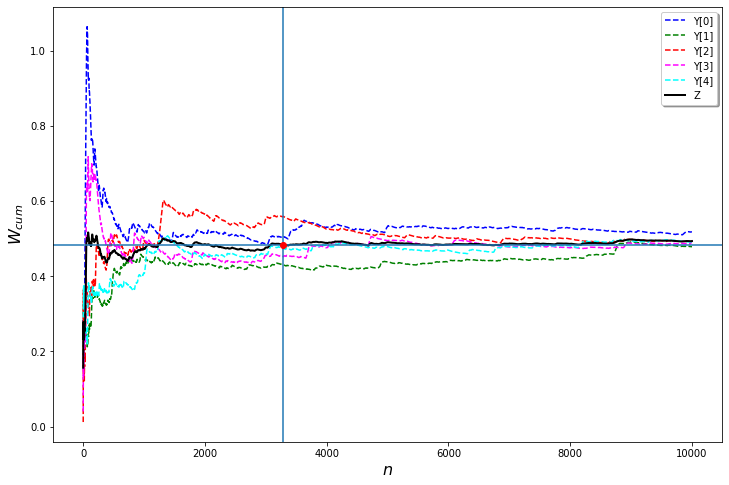

In [ ]:
lamda = 4.0
mu = 6.0

n = 10000                         # Número de clientes/paquetes simulados
R = 5                             # Número de repeticiones

Y =  np.zeros( shape = (R, n) )   # Variable de salida W

# Generamos las muestras/repeticiones
for i in range(R):
    seed()
    Y[i] = mm1_W_cum(lamda, mu, n)

# Calculamos la media
Z = []
for i in range(n):
    Z.append( sum(Y[:,i]) / R )

ListaF = [round(i,5) for i in Z]

y=round(mean(Z),5)
print('\n',y)
print('\n'.join(map(str, ListaF)))

# Graficamos Y y Z
fig = figure(1, figsize=(12, 8))
plot(Y[0], "k--", label="Y[0]", color='blue')
plot(Y[1], "k--", label="Y[1]", color='green')
plot(Y[2], "k--", label="Y[2]", color='red')
plot(Y[3], "k--", label="Y[3]", color='magenta')
plot(Y[4], "k--", label="Y[4]", color='cyan')
plot(Z, "k", linewidth=2, label="Z")
axhline(y)
k=ListaF.index(y)
axvline(k)
plt.plot(k,y, marker="o", color="red")
xlabel("$n$", size=16)
ylabel("$W_{cum}$", size=16)
legend(loc='upper right', shadow=True)
show()